In [16]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd 

In [17]:
siginfo = pd.read_csv('../../data/siginfo_beta.txt', sep='\t', low_memory=False)
siginfo.head()

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,...,cell_iname,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_exemplar_sig,is_ncs_sig,is_null_sig
0,b17,NaN,100.0,ug/ml,100 ug/ml,336 h,336.0,h,N8,BRD-U44432129,...,NAMEC8,H05|H06|H07|H08,MET001_N8_XH_X1_B17,MET001_N8_XH_X1_B17:H05|MET001_N8_XH_X1_B17:H0...,NaN,MET,BRD-U44432129,0,0.0,0.0
1,b15,10.0,10.0,uM,10 uM,3 h,3.0,h,A549,BRD-K81418486,...,A549,L04|L08|L12,ABY001_A549_XH_X1_B15,ABY001_A549_XH_X1_B15:L04|ABY001_A549_XH_X1_B1...,NaN,ABY,vorinostat,0,1.0,0.0
2,b15,2.5,2.5,uM,2.5 uM,24 h,24.0,h,HT29,BRD-K70511574,...,HT29,E18|E22,ABY001_HT29_XH_X1_B15,ABY001_HT29_XH_X1_B15:E18|ABY001_HT29_XH_X1_B1...,NaN,ABY,HMN-214,0,1.0,0.0
3,b18,10.0,10.0,uM,10 uM,3 h,3.0,h,HME1,BRD-K81418486,...,HME1,F19,LTC002_HME1_3H_X1_B18,LTC002_HME1_3H_X1_B18:F19,NaN,LTC,vorinostat,0,0.0,0.0
4,b15,10.0,10.0,uM,10 uM,3 h,3.0,h,H1975,BRD-A61304759,...,H1975,P01|P05|P09,ABY001_H1975_XH_X1_B15,ABY001_H1975_XH_X1_B15:P01|ABY001_H1975_XH_X1_...,NaN,ABY,tanespimycin,0,0.0,0.0


/tmp/ipykernel_5850/1909769674.py:2: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(siginfo.pert_dose.values))


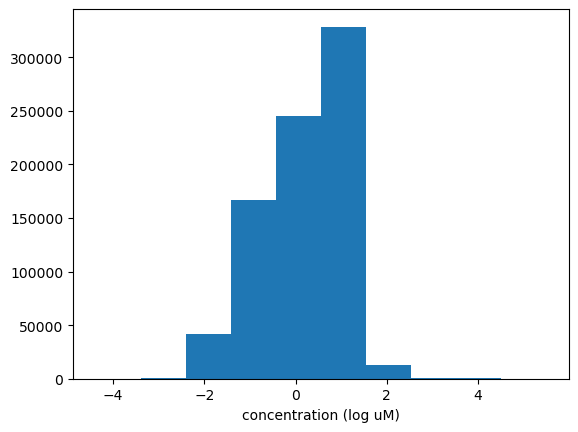

In [20]:
plt.figure()
plt.hist(np.log10(siginfo.pert_dose.values))
plt.xlabel('concentration (log uM)')
plt.show()

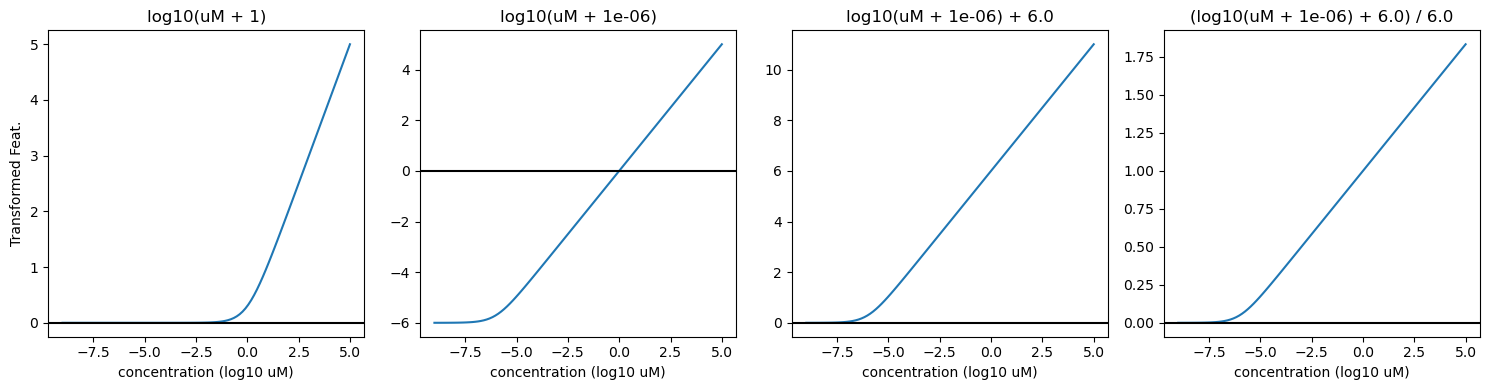

In [48]:
eps = 1e-6

x = np.logspace(-9,5, 100)

f,axes = plt.subplots(1,4,figsize=(15,4))

y = np.log10(x + 1)
axes.flat[0].set_title('log10(uM + 1)')
axes.flat[0].plot(np.log10(x),y)
#axes.flat[0].set_xscale('log')
axes.flat[0].axhline(0, c='k')
axes.flat[0].set_xlabel('concentration (log10 uM)')
axes.flat[0].set_ylabel('Transformed Feat.')


y = np.log10(x + eps)
axes.flat[1].set_title(f'log10(uM + {eps})')
axes.flat[1].plot(np.log10(x),y)
#axes.flat[1].set_xscale('log')
axes.flat[1].axhline(0, c='k')
axes.flat[1].set_xlabel('concentration (log10 uM)')


y = np.log10(x + eps) - np.log10(eps)
axes.flat[2].set_title(f'log10(uM + {eps}) + {-np.log10(eps)}')
axes.flat[2].plot(np.log10(x),y)
#axes.flat[2].set_xscale('log')
axes.flat[2].axhline(0, c='k')
axes.flat[2].set_xlabel('concentration (log10 uM)')

y = (np.log10(x + eps) - np.log10(eps))/(-np.log10(eps))
axes.flat[3].set_title(f'(log10(uM + {eps}) + {-np.log10(eps)}) / {-np.log10(eps)}')
axes.flat[3].plot(np.log10(x),y)
#axes.flat[3].set_xscale('log')
axes.flat[3].axhline(0, c='k')
axes.flat[3].set_xlabel('concentration (log10 uM)')

plt.tight_layout()
plt.show()

In [49]:
(np.log10(0 + eps) - np.log10(eps))/(-np.log10(eps))

0.0

In [53]:
mut = pd.read_csv('../../data/ccle_mutation.txt', sep=',', low_memory=False)
mut.head()

,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,...,isCOSMIChotspot,COSMIChsCnt,ExAC_AF,Variant_annotation,CGA_WES_AC,HC_AC,RD_AC,RNAseq_AC,SangerWES_AC,WGS_AC
0,VPS13D,55187,37,1,12359347,12359347,+,Nonsense_Mutation,SNP,C,...,False,0.0,NaN,damaging,34:213,NaN,NaN,NaN,34:221,NaN
1,AADACL4,343066,37,1,12726308,12726322,+,In_Frame_Del,DEL,CTGGCGTGACGCCAT,...,False,3.0,NaN,other non-conserving,57:141,NaN,NaN,NaN,9:0,28:32
2,IFNLR1,163702,37,1,24484172,24484172,+,Silent,SNP,G,...,False,0.0,NaN,silent,118:0,NaN,NaN,10:0,118:0,18:0
3,TMEM57,55219,37,1,25785018,25785019,+,Frame_Shift_Ins,INS,-,...,False,0.0,NaN,damaging,NaN,NaN,NaN,6:28,NaN,NaN
4,ZSCAN20,7579,37,1,33954141,33954141,+,Missense_Mutation,SNP,T,...,False,0.0,NaN,other non-conserving,28:62,NaN,NaN,NaN,27:61,NaN


In [54]:
mut.columns

Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'NCBI_Build', 'Chromosome',
       'Start_position', 'End_position', 'Strand', 'Variant_Classification',
       'Variant_Type', 'Reference_Allele', 'Alternate_Allele', 'dbSNP_RS',
       'dbSNP_Val_Status', 'Genome_Change', 'Annotation_Transcript',
       'DepMap_ID', 'cDNA_Change', 'Codon_Change', 'Protein_Change',
       'isDeleterious', 'isTCGAhotspot', 'TCGAhsCnt', 'isCOSMIChotspot',
       'COSMIChsCnt', 'ExAC_AF', 'Variant_annotation', 'CGA_WES_AC', 'HC_AC',
       'RD_AC', 'RNAseq_AC', 'SangerWES_AC', 'WGS_AC'],
      dtype='object')

In [55]:
mut[lambda x: x.Hugo_Symbol == 'EGFR']

,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,...,isCOSMIChotspot,COSMIChsCnt,ExAC_AF,Variant_annotation,CGA_WES_AC,HC_AC,RD_AC,RNAseq_AC,SangerWES_AC,WGS_AC
3308,EGFR,1956,37,7,55242466,55242480,+,In_Frame_Del,DEL,GAATTAAGAGAAGCA,...,True,1571.0,NaN,other non-conserving,239:73,966:51,NaN,161:72,37:0,521:151
8166,EGFR,1956,37,7,55221723,55221723,+,Missense_Mutation,SNP,A,...,False,1.0,NaN,other non-conserving,27:69,92:200,NaN,115:266,NaN,NaN
8955,EGFR,1956,37,7,55242466,55242480,+,In_Frame_Del,DEL,GAATTAAGAGAAGCA,...,True,1571.0,NaN,other non-conserving,1951:337,NaN,NaN,206:52,NaN,NaN
9456,EGFR,1956,37,7,55242465,55242479,+,In_Frame_Del,DEL,GGAATTAAGAGAAGC,...,True,1576.0,NaN,other non-conserving,28:35,28:10,NaN,161:59,39:0,73:19
10389,EGFR,1956,37,7,55242465,55242479,+,In_Frame_Del,DEL,GGAATTAAGAGAAGC,...,True,1576.0,NaN,other non-conserving,27:57,77:102,NaN,69:137,27:0,35:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174017,EGFR,1956,37,7,55233043,55233043,+,Missense_Mutation,SNP,G,...,True,15.0,0.000008,other non-conserving,89:110,NaN,NaN,NaN,92:109,NaN
1176805,EGFR,1956,37,7,55210075,55210075,+,Missense_Mutation,SNP,T,...,False,3.0,NaN,other non-conserving,32:106,NaN,NaN,NaN,33:108,NaN
1191343,EGFR,1956,37,7,55223558,55223558,+,Missense_Mutation,SNP,C,...,False,0.0,NaN,other non-conserving,8:25,NaN,NaN,NaN,NaN,NaN
1195580,EGFR,1956,37,7,55211060,55211060,+,Silent,SNP,G,...,False,0.0,NaN,silent,38:88,NaN,NaN,NaN,42:89,NaN
